# 차원 축소

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### PCA (Principal Component Analysis)
- 데이터를 가장 잘 설명할 수 있는, 분산을 최대화하는 방향으로 축을 결정
- 차원축소할 떄 가장 많이 쓰임

In [2]:
from sklearn.datasets import load_iris

iris_data = load_iris()

iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['target'] = iris_data.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


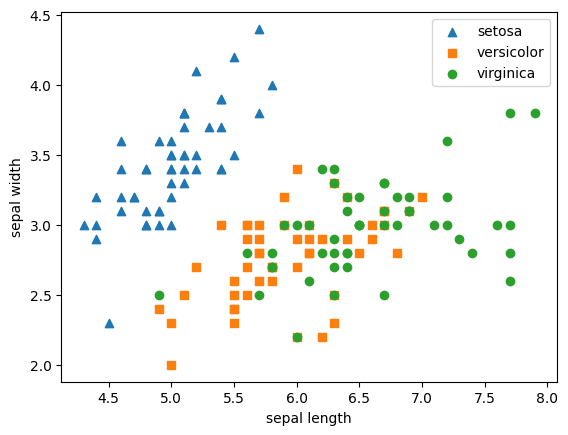

In [3]:
# 특성 2개만 뽑아서 시각화
markers = ['^','s','o']

for i, marker in enumerate(markers):
    x = iris_df[iris_df['target']==i]['sepal length (cm)']
    y = iris_df[iris_df['target']==i]['sepal width (cm)']
    plt.scatter(x,y, marker=marker, label=iris_data.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [9]:
# PCA 주성분 분석
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # 2차원으로 축소

X = iris_df.iloc[:,:-1] # 독립변수 (특성 데이터)만 보아서 x

pca.fit(X)
iris_pca = pca.transform(X) # fit_transform해도 같은 결과가 나오는지?

iris_pca_df = pd.DataFrame(iris_pca, columns=['pca_col1','pca_col2'])
iris_pca_df['target'] = iris_data.target

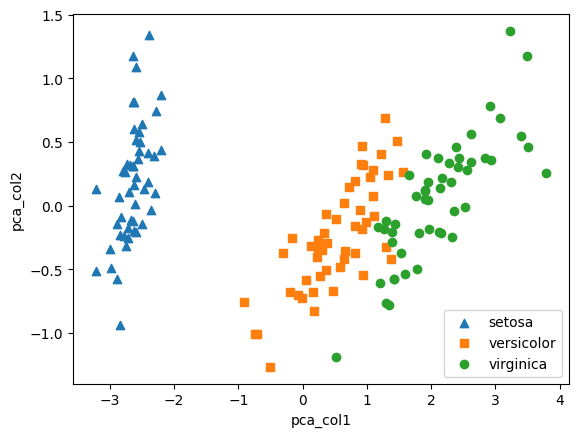

In [ ]:
# 축소한 차원으로 시각화
markers = ['^','s','o']

for i, marker in enumerate(markers):
    x = iris_pca_df[iris_df['target']==i]['pca_col1']
    y = iris_pca_df[iris_df['target']==i]['pca_col2']
    plt.scatter(x,y, marker=marker, label=iris_data.target_names[i])

plt.legend()
plt.xlabel('pca_col1')
plt.ylabel('pca_col2')
plt.show()

In [ ]:
# pca를 통해 생성된 실제 데이터의 총 분산에 얼마만큼의 비율을 나타내는지
pca.explained_variance_ratio_
# 차원을 축소시킨 것들로 성능이 향상됨을 볼 수 있음
# 완전하게 특성들을 설명하지 못할 경우 1에 근사하게 데이터들이 나옴 (데이터들의 합 <= 1)

array([0.92461872, 0.05306648])

In [ ]:
# 원본 데이터 학습 및 평가  
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score # 학습 평가

# 모델 만들기
lr_clf = LogisticRegression(max_iter=1000)

scores = cross_val_score(lr_clf, iris_data.data, iris_data.target, cv=5) # 인자 순서: 검증을 수행할 모델, 원본 데이터, y데이터, cv속성값(몇 번의 검증을 할지)
# scores # [0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]: 5번의 교차검증이 들어가서 각각의 성능 평가 값이 출력됨
print('원본 데이터 평가: ', np.mean(scores)) # 0.9733333333333334: 평균적인 정확도를 출력

# 이제 얘를 가지고 차원 축소를 했을 때 정확도가 어떻게 변하는지 봅시다

원본 데이터 평가:  0.9733333333333334


In [ ]:
# PCA 데이터 학습 및 평가
lr_clf = LogisticRegression(max_iter=1000)
scores = cross_val_score(lr_clf, iris_pca_df[['pca_col1','pca_col2']], iris_pca_df['target'], cv=5) # 원본 데이터에 대괄호 두개하는 이유는 두 개의 컬럼을 주기 때문
print('pca 데이터 평가: ', np.mean(scores)) # 원본데이터보다 낮은 정확도가 나옴 그래도 높은 정확도
# 보통 성능이 향상되기를 기대하면서 pca를 사용하긴 함
# 성능 향상을 위해 사용했던 거 하나 더 polynomialfeatures 

pca 데이터 평가:  0.96


---

##### PCA 과일 데이터
- 흑백 이미지 데이터 픽셀값 0(흑)~255(백)

In [18]:
fruits = np.load('./data/fruits_300.npy')
fruits.shape

(300, 100, 100)

In [32]:
# 이미지 시각화 함수
def draw_fruits(arr, ratio=1):
    N = len(arr)
    rows = int(np.ceil(N/10))
    cols = N if rows < 2 else 10
    fig, ax = plt.subplots(
        rows, cols, 
        figsize=(cols * ratio, rows * ratio),
        squeeze=False # 전달받을 때 차원을 축소할 수 있어서 2차원 형태 유지시키게 false로 주기
    )

    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < N: # 마지막 갯수 제한
                ax[i, j].imshow(arr[i * 10 + j], cmap='gray_r') # cmap 옵션: color 지정
            ax[i, j].axis('off')
    
    plt.show()

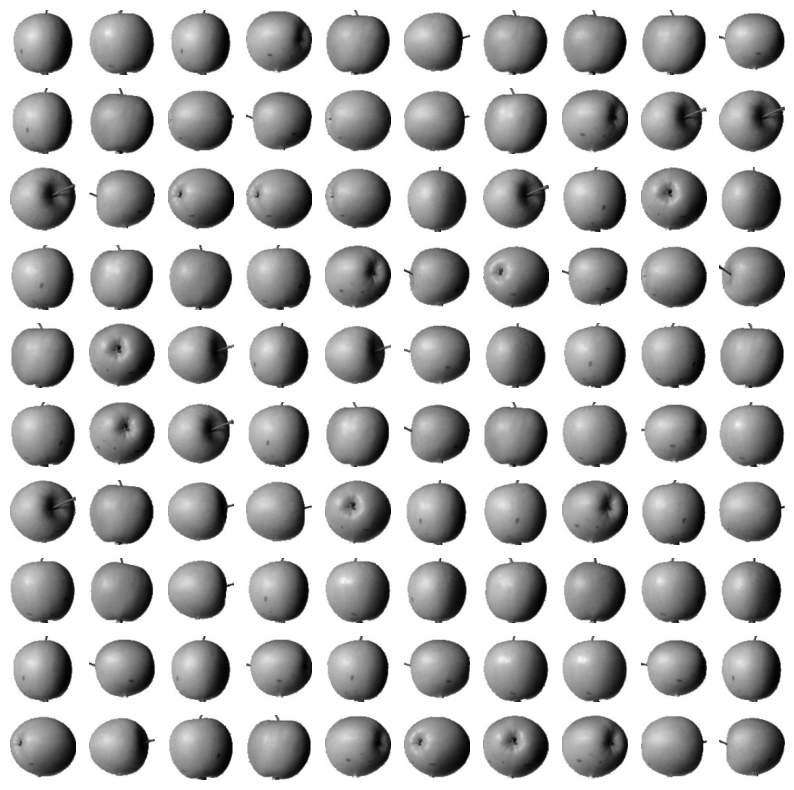

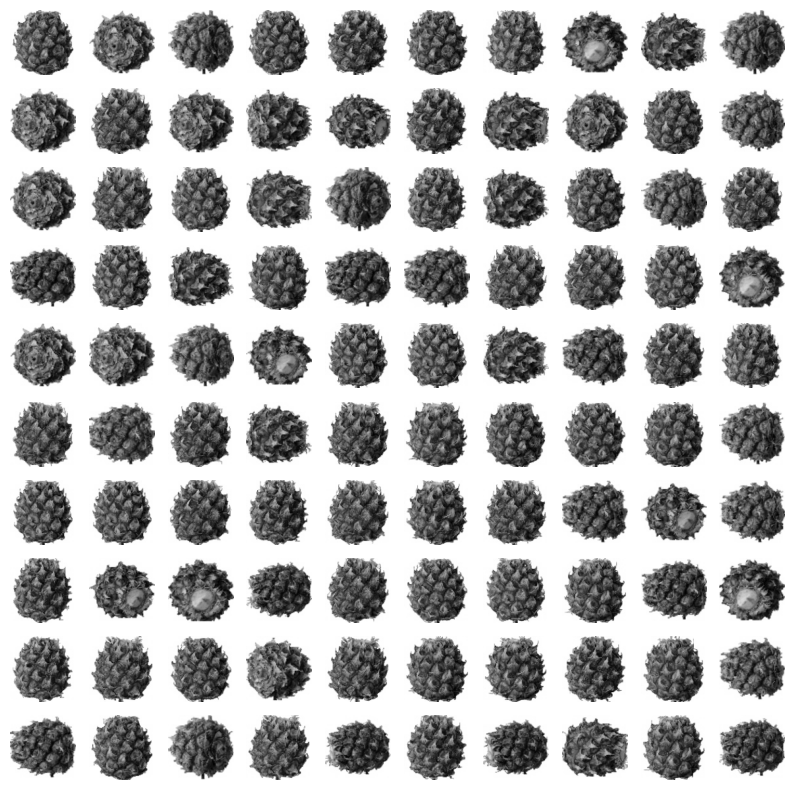

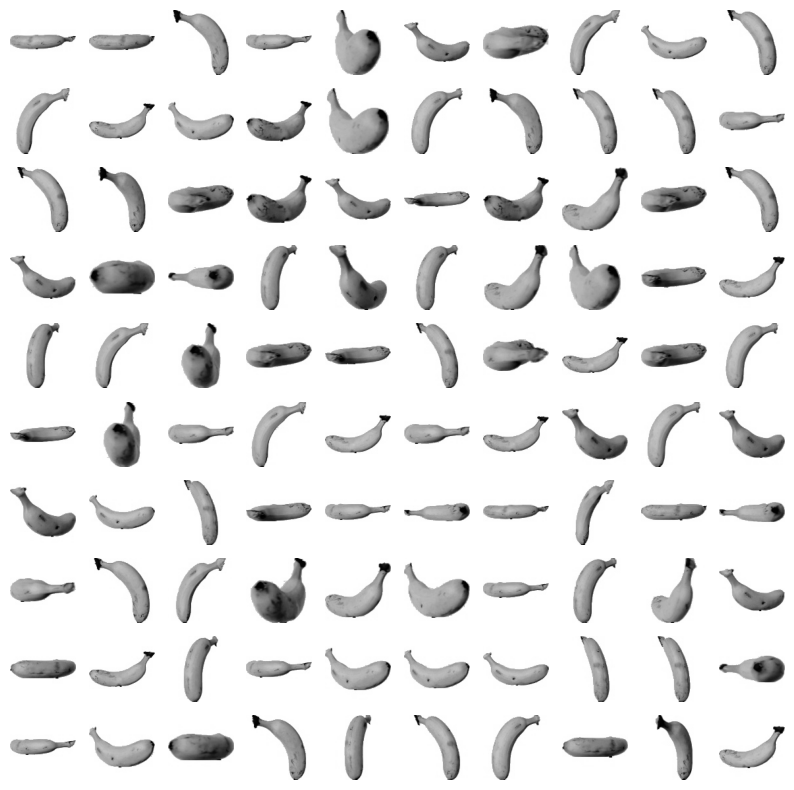

In [33]:
draw_fruits(fruits[:100]) # 사과
draw_fruits(fruits[100:200]) # 파인애플
draw_fruits(fruits[200:300]) # 바나나

In [ ]:
# 이미지 데이터 1차원으로 펼치기
fruits_1d = fruits.reshape(300, 100 * 100)
fruits_1d.shape

(300, 10000)

In [34]:
pca = PCA(n_components=50) # n_components: 몇개의 차원으로 줄이겠다!! 할 때 쓰는거
pca.fit(fruits_1d)


PCA(n_components=50)

In [ ]:
pca.components_.shape # (50,10000) = (PCA로 구현한 주성분 개수, 원본 데이터 특성 개수)

(50, 10000)

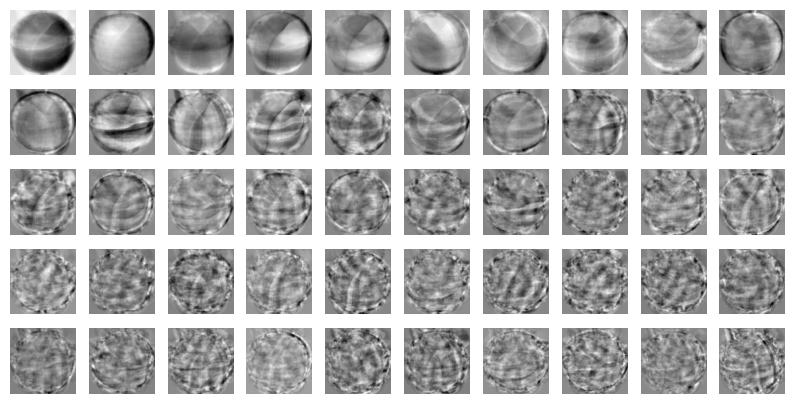

In [ ]:
draw_fruits(pca.components_.reshape(-1,100,100)) # pca.components_는 2차원인데, draw_fruits는 3차원의 이미지를 출력하는 거라 차원을 바꿔줘야함

In [ ]:
fruits_pca = pca.transform(fruits_1d) # 10000개의 차원을 50개의 차원으로 축소한거를 transform
fruits_pca.shape

(300, 50)

In [41]:
# PCA 데이터 저장
np.save('./data/fruits_pca.npy', fruits_pca)

In [42]:
# 저장한 PCA 데이터 로드
fruits_pca = np.load('./data/fruits_pca.npy')

[0.42357017 0.09941755 0.06577863 0.04031172 0.03416875 0.03281329
 0.02573267 0.02054963 0.01372276 0.01342773 0.01152146 0.00944596
 0.00878232 0.00846697 0.00693049 0.00645188 0.00578896 0.00511202
 0.00486383 0.00480346 0.00447837 0.00437319 0.00408041 0.00389475
 0.0037243  0.00359262 0.00331466 0.00317852 0.00304318 0.00303656
 0.00288912 0.00275741 0.00264985 0.00255638 0.00252086 0.00247433
 0.00239113 0.00230519 0.00222067 0.00216575 0.00213493 0.00196099
 0.00191455 0.00190665 0.00185252 0.001822   0.00173354 0.00169235
 0.00163299 0.0015983 ]
0.9215563311038265


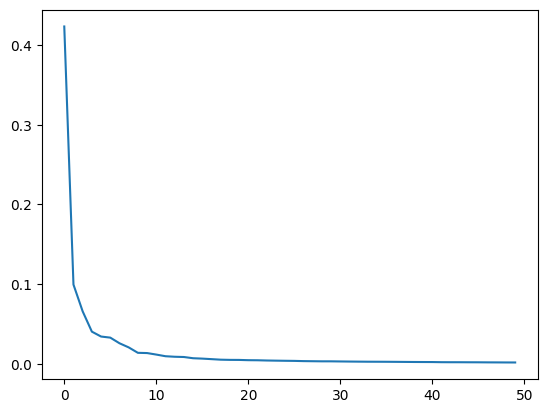

In [44]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [46]:
# 라벨 데이터
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [ ]:
# 원본 데이터 교차검증 점수 확인

# cross_val_score: 각 cv의 점수 반환
# cross_validate: 각 cv의 학습시간, 테스트시간, cv의 점수 반환 (평가지표 여러 개 사용 가능)
from sklearn.model_selection import cross_validate

lr_clf = LogisticRegression(max_iter=1000)
result = cross_validate(lr_clf, fruits_1d, target, cv=3) # 모델, 원본 데이터, y 데이터, 검증 횟수
result

{'fit_time': array([0.16124821, 0.15433311, 0.17313218]),
 'score_time': array([0.00249243, 0.0029912 , 0.0030055 ]),
 'test_score': array([1.  , 1.  , 0.99])}

In [51]:
# pca 데이터 교차검증 점수 확인
result_pca = cross_validate(lr_clf, fruits_pca, target, cv=3)
result_pca

{'fit_time': array([0.0123024 , 0.00697374, 0.0050025 ]),
 'score_time': array([0.00102139, 0.        , 0.00099826]),
 'test_score': array([1.  , 1.  , 0.99])}

In [ ]:
# 원본 데이터 복구(inverse_transform)
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape

(300, 10000)

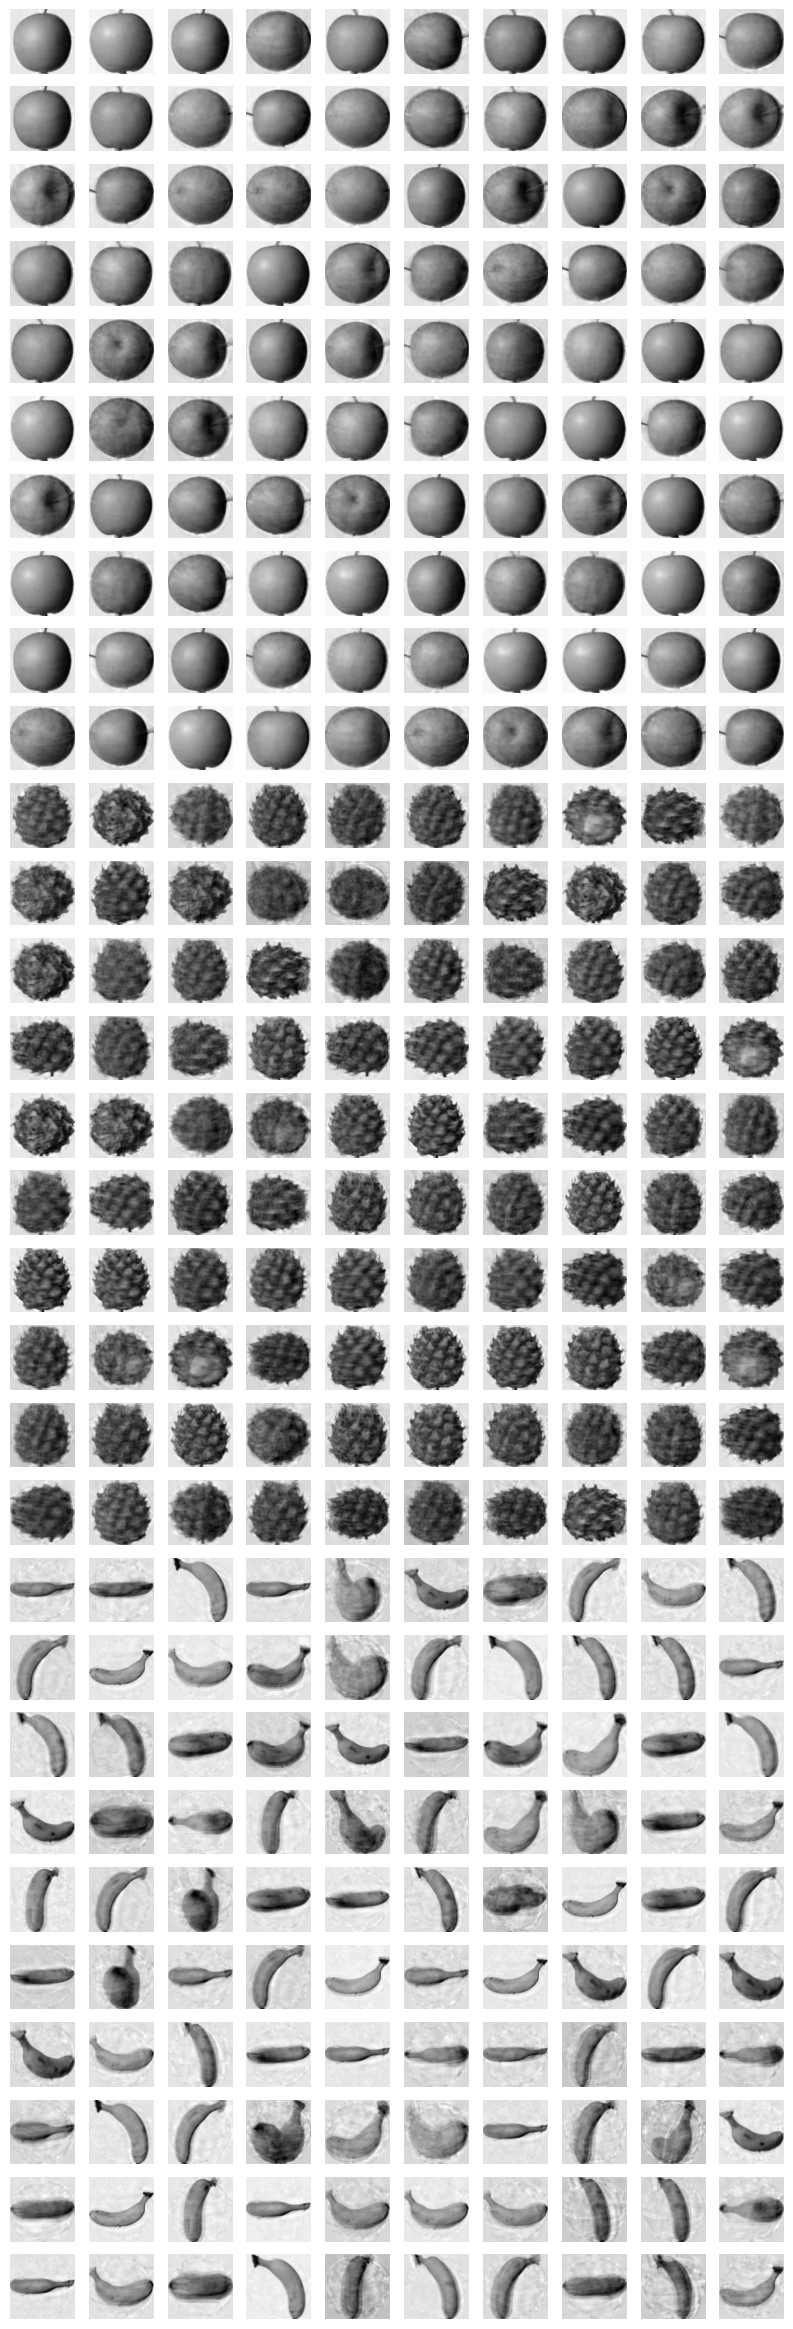

In [ ]:
# 복구 이미지 시각화
draw_fruits(fruits_inverse.reshape(-1,100,100))

---

### LDA (Linear Discriminant Analysis) 
- 타겟 클래스 간 분리를 최대로 하는 축으로 결정 (타겟 클래스 안에 있는 데이터에 한해서는 분산이 최소화되는 방향으로 결정됨)
- pca는 라벨 데이터만 필요하지만 lda는 타겟 데이터도 필요한 지도학습의 일종

In [ ]:
# iris_data에서 특성 데이터만 전달해서 fit_tranform(정규화)
from sklearn.preprocessing import StandardScaler

iris_data = load_iris()

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_data.data)
iris_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [56]:
# LDA 변환
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
iris_lda = lda.fit_transform(iris_scaled, iris_data.target) # x 데이터, y 데이터

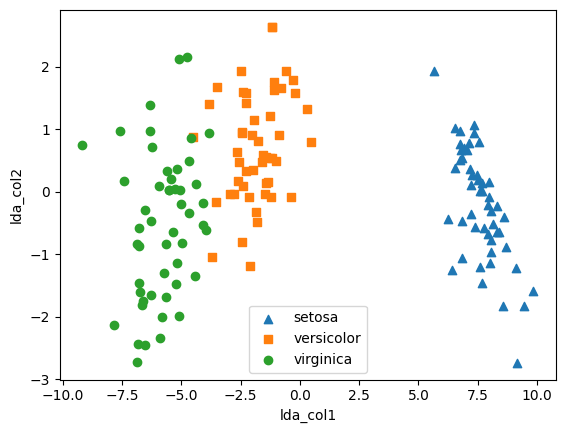

In [ ]:
# LDA로 축소한 데이터 시각화

iris_lda_df = pd.DataFrame(iris_lda, columns=['lda_col1','lda_col2'])
iris_lda_df['target'] = iris_data.target

markers = ['^','s','o']

for i, marker in enumerate(markers):
    x = iris_lda_df[iris_lda_df['target']==i]['lda_col1']
    y = iris_lda_df[iris_lda_df['target']==i]['lda_col2']
    plt.scatter(x,y, marker=marker, label=iris_data.target_names[i])

plt.legend()
plt.xlabel('lda_col1')
plt.ylabel('lda_col2')
plt.show()

# pca가 차원축소할 때 가장 많이 쓰임임

---

### LLE (Locally Linear Embedding)
- 데이터 포인트를 근접한 이웃과 선형 결합으로 표현하고 이를 유지하도록 저차원 공간에 매핑

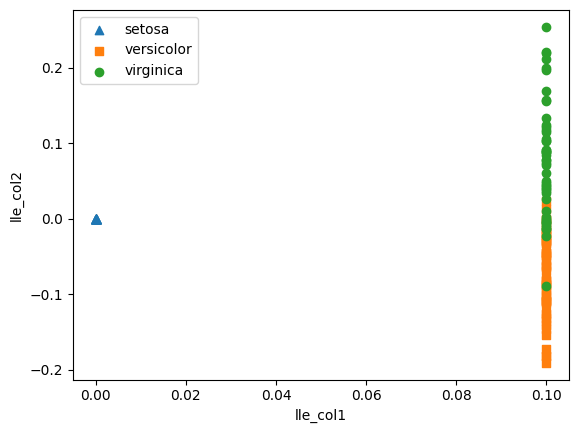

In [64]:
from sklearn.manifold import LocallyLinearEmbedding

iris_data = load_iris()

# LLE 변환
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10) # 차원 개수, 이웃의 수
iris_lle = lle.fit_transform(iris_data.data) # lda와 다르게 pca와 같게 x데이터에 해당하는 것만 넣기

# LLE(저차원 공간을 매핑시켜 관계를 시각화해줌)로 차원 축소한 것 시각화
iris_lle_df = pd.DataFrame(iris_lle, columns=['lle_col1','lle_col2'])
iris_lle_df['target'] = iris_data.target

markers = ['^','s','o']

for i, marker in enumerate(markers):
    x = iris_lle_df[iris_lle_df['target']==i]['lle_col1']
    y = iris_lle_df[iris_lle_df['target']==i]['lle_col2']
    plt.scatter(x,y, marker=marker, label=iris_data.target_names[i])

plt.legend()
plt.xlabel('lle_col1')
plt.ylabel('lle_col2')
plt.show()

In [66]:
# LLE 변환 데이터 교차 검증 확인
result = cross_validate(
    lr_clf, 
    iris_lle_df[['lle_col1','lle_col2']],
    iris_lle_df['target'],
    cv=3
)
result

{'fit_time': array([0.00400186, 0.0039978 , 0.00399828]),
 'score_time': array([0.00100231, 0.00130391, 0.00100327]),
 'test_score': array([0.94, 0.9 , 0.9 ])}

In [ ]:
print(lle.n_neighbors) # 이웃 수
print(lle.n_components) # 축소된 차원수
print(lle.reconstruction_error_) # 재구성 오차 (고차원 데이터를 저차원으로 축소하는건데 선형으로 주변 이웃 데이터와의 포인트 결합으로 나타내는데, lle을 수행하고 원래 데이터로 복원할 때 얼마나 그 관계성을 잘 표현했는지 즉, 원래 있던 이웃 관계를 잘 표현하면서 축소시켰는지 확인해줌, 값이 작을수록 이웃관계를 더 잘 표현했다고 할 수 있음)

10
2
5.1168977786832e-07
